<a href="https://colab.research.google.com/github/Szermekm/Projects/blob/main/Radar_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install soccerplots

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [3]:
# read the data
!wget https://raw.githubusercontent.com/Szermekm/Projects/main/radars.csv%20-%20Munkalap1.csv

--2022-08-07 19:12:25--  https://raw.githubusercontent.com/Szermekm/Projects/main/radars.csv%20-%20Munkalap1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22132 (22K) [text/plain]
Saving to: ‘radars.csv - Munkalap1.csv.9’

radars.csv - Munkal 100%[===================>]  21.61K  --.-KB/s    in 0.001s  

2022-08-07 19:12:25 (24.6 MB/s) - ‘radars.csv - Munkalap1.csv.9’ saved [22132/22132]



In [4]:
df = pd.read_csv('radars.csv - Munkalap1.csv')

In [5]:
df.head()

,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,-9999
0,Brenden Aaronson,us USA,FW,Leeds United,21-289,2000,0.9,0,1,0,...,0,0,0,0.0,0.0,0.05,0.0,0.0,Matches,5bc43860
1,Tyler Adams,us USA,MF,Leeds United,23-174,1999,1.0,0,1,0,...,0,0,0,0.0,0.0,0.02,0.0,0.0,Matches,2b09d998
2,Tosin Adarabioyo,eng ENG,DF,Fulham,24-317,1997,1.0,0,0,0,...,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches,c81d773d
3,Rayan Aït Nouri,fr FRA,DF,Wolves,21-062,2001,1.0,0,0,0,...,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches,9b398aea
4,Thiago Alcántara,es ESP,MF,Liverpool,31-118,1991,0.6,0,0,0,...,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches,77e84962


In [6]:
df = df[(df['Player']=='Dejan Kulusevski') | (df['Player']=='Gabriel Jesus')].reset_index()

In [7]:
df

,index,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,-9999
0,84,Gabriel Jesus,br BRA,FW,Arsenal,25-126,1997,0.9,0,1,...,0,0,0,0.1,0.1,0.13,-0.1,-0.1,Matches,b66315ae
1,98,Dejan Kulusevski,se SWE,FW,Tottenham,22-104,2000,0.9,1,2,...,0,0,0,0.2,0.2,0.09,0.8,0.8,Matches,df3cda47


In [8]:
df = df.drop(['index','Nation','Pos','Squad','Age','Born','90s','FK','PK','PKatt','Matches','-9999','G/SoT'],axis=1)

In [9]:
df

,Player,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,Dist,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Gabriel Jesus,0,1,0,0.0,1.10,0.00,0.0,15.0,0.1,0.1,0.13,-0.1,-0.1
1,Dejan Kulusevski,1,2,1,50.0,2.12,1.06,0.5,13.2,0.2,0.2,0.09,0.8,0.8


In [10]:
#get parameters

params = list(df.columns)
params = params[1:]

In [11]:
#add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []

for x in params:
  a = min(df[params][x])
  a = a - (a*.25)

  b = max(df[params][x])
  b = b + (b*.25)

  ranges.append((a,b))

for x in range(len(df['Player'])):
  if df['Player'][x] == 'Dejan Kulusevski':
    a_values = df.iloc[x].values.tolist()
  if df['Player'][x] == 'Gabriel Jesus':
    b_values = df.iloc[x].values.tolist() 

a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [12]:
values

[[1, 2, 1, 50.0, 2.12, 1.06, 0.5, 13.2, 0.2, 0.2, 0.09, 0.8, 0.8],
 [0, 1, 0, 0.0, 1.1, 0.0, 0.0, 15.0, 0.1, 0.1, 0.13, -0.1, -0.1]]

In [15]:
#title

title = dict(
    title_name = 'Dejan Kulusevski',
    title_color = 'blue',
    subtitle_name = 'Spurs',
    subtitle_color = 'blue',
    title_name_2 = 'Gabriel Jesus',
    title_color_2 = 'red',
    subtitle_name_2 = 'Arsenal',
    subtitle_color_2 = 'red',
    title_fontsize = 18,
    subtitle_fontsize = 15
)

endnote = '@MSzermek\ndata via FBREF / Statsbomb'

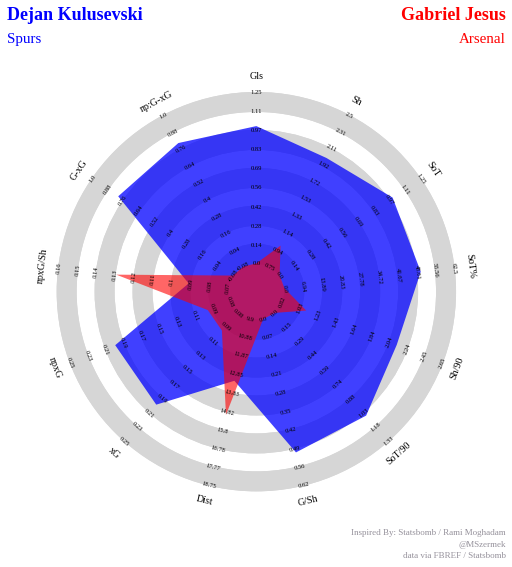

In [16]:
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['blue','red'],
                         alphas=[.75,.6], title=title, endnote=endnote, 
                         compare=True)